Get multif0 metrics for Benetos and Duan's algorithms on the Bach10, Su, and MedleyDB test sets and save results to csv files.

At the end there's a sanity-check plot of a reference vs. estimate multif0.

In [1]:
import glob
import os
import mir_eval
import pandas

## evaluate

In [2]:
def get_mf0_scores(est_path, ref_path, test_set_name, algorithm_name):

    all_scores = []
    est_files = glob.glob(os.path.join(est_path, '*.txt'))

    for est_file in est_files:
        file_key = "_".join(os.path.basename(est_file).replace('-', '_').split('_')[:2])
        file_key = file_key.split('.')[0]
        print(file_key)
        file_glob = glob.glob(os.path.join(ref_path, '{}*.txt'.format(file_key)))
        if len(file_glob) > 1:
            print(file_glob)
        ref_file = file_glob[0]

        # load ground truth labels
        ref_times, ref_freqs = \
            mir_eval.io.load_ragged_time_series(ref_file)

        # load est labels
        est_times, est_freqs = \
            mir_eval.io.load_ragged_time_series(est_file)

        # get multif0 metrics and append
        scores = mir_eval.multipitch.evaluate(
            ref_times, ref_freqs, est_times, est_freqs)
        scores['track'] = file_key
        all_scores.append(scores)

    # save scores to data frame
    save_path = '../outputs'
    scores_path = os.path.join(
        save_path, '{}_{}_all_scores.csv'.format(test_set_name, algorithm_name)
    )
    score_summary_path = os.path.join(
        save_path, "{}_{}_score_summary.csv".format(test_set_name, algorithm_name)
    )
    df = pandas.DataFrame(all_scores)
    df.to_csv(scores_path)
    df.describe().to_csv(score_summary_path)
    print(df.describe())

In [4]:
get_mf0_scores(
    '../comparisons/multif0/algorithm_outputs/bach10/benetos/',
    '../comparisons/multif0/datasets/bach10/gt_F0',
    'bach10', 'benetos'
)

07_HerrGott


/home/rmb456/anaconda2/lib/python2.7/site-packages/mir_eval/multipitch.py:410: UserWarning: Estimate times not equal to reference times. Resampling to common time base.
  warnings.warn("Estimate times not equal to reference times. "


04_ChristeDuBeistand
03_ChristederdubistTagundLicht
05_DieNacht
01_AchGottundHerr
06_DieSonne
02_AchLiebenChristen
09_Jesus
08_FuerDeinenThron
10_NunBitten
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  10.000000  10.000000  10.000000           10.000000   10.000000   
mean    0.839325   0.887114   0.758471            0.052563    0.060323   
std     0.023613   0.016756   0.026418            0.012215    0.009504   
min     0.802589   0.853465   0.715272            0.036153    0.044226   
25%     0.821508   0.876586   0.735452            0.044067    0.054366   
50%     0.844205   0.888768   0.766557            0.051990    0.059772   
75%     0.846870   0.897946   0.777906            0.055583    0.068767   
max     0.873946   0.907755   0.794735            0.077433    0.071605   

       False Alarm Error  Total Error  Chroma Precision  Chroma Recall  \
count          10.000000    10.000000         10.000000      10.000000   
mean            0.117816     

In [5]:
get_mf0_scores(
    '../comparisons/multif0/algorithm_outputs/bach10/duan/',
    '../comparisons/multif0/datasets/bach10/gt_F0',
    'bach10', 'duan'
)

01_AchGottundHerr
06_DieSonne
03_ChristederdubistTagundLicht
02_AchLiebenChristen
04_ChristeDuBeistand
08_FuerDeinenThron
10_NunBitten
09_Jesus
05_DieNacht
07_HerrGott
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  10.000000  10.000000  10.000000           10.000000   10.000000   
mean    0.903645   0.734931   0.681651            0.068567    0.196502   
std     0.011399   0.026293   0.026199            0.011152    0.025209   
min     0.880546   0.678247   0.621099            0.050990    0.143574   
25%     0.898188   0.724119   0.670716            0.060529    0.186132   
50%     0.904623   0.738245   0.688671            0.070464    0.201989   
75%     0.909998   0.748831   0.693292            0.075745    0.205246   
max     0.920922   0.777712   0.716950            0.086520    0.235233   

       False Alarm Error  Total Error  Chroma Precision  Chroma Recall  \
count          10.000000    10.000000         10.000000      10.000000   
mean            0

In [6]:
get_mf0_scores(
    '../comparisons/multif0/algorithm_outputs/su/benetos/',
    '../comparisons/multif0/datasets/su/gt_F0/',
    'su', 'benetos'
)

VS04_Franck
PS01_Beethoven
SQ02_Janacek
PQ02_Elgar
PS03_Mozart
SQ03_Schubert
SQ01_Beethoven
PS02_Chopin
PQ03_Farranc
VS01_Schumann
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  10.000000  10.000000  10.000000           10.000000   10.000000   
mean    0.613793   0.480070   0.355545            0.183394    0.336536   
std     0.125494   0.106028   0.051333            0.063667    0.145235   
min     0.445174   0.326561   0.269857            0.081385    0.110613   
25%     0.518279   0.397332   0.322989            0.138808    0.254880   
50%     0.589266   0.478306   0.364032            0.193552    0.325793   
75%     0.719192   0.553348   0.387843            0.234255    0.432393   
max     0.824622   0.663226   0.434696            0.258056    0.561971   

       False Alarm Error  Total Error  Chroma Precision  Chroma Recall  \
count          10.000000    10.000000         10.000000      10.000000   
mean            0.164506     0.684436          0.69848

In [7]:
get_mf0_scores(
    '../comparisons/multif0/algorithm_outputs/su/duan/',
    '../comparisons/multif0/datasets/su/gt_F0/',
    'su', 'duan'
)

VS01_Schumann
PS01_Beethoven
VS04_Franck
SQ03_Schubert
PS02_Chopin
SQ02_Janacek
PQ02_Elgar
SQ01_Beethoven
PQ03_Farranc
PS03_Mozart
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  10.000000  10.000000  10.000000           10.000000   10.000000   
mean    0.609060   0.418813   0.317448            0.198624    0.382563   
std     0.140752   0.115078   0.064461            0.086483    0.175184   
min     0.438974   0.273319   0.222871            0.061859    0.179311   
25%     0.509016   0.350423   0.264217            0.136535    0.200141   
50%     0.575578   0.384937   0.315047            0.230784    0.432992   
75%     0.723777   0.500305   0.366185            0.252424    0.499918   
max     0.829456   0.606169   0.409627            0.300685    0.664822   

       False Alarm Error  Total Error  Chroma Precision  Chroma Recall  \
count          10.000000    10.000000         10.000000      10.000000   
mean            0.114668     0.695855          0.71207

In [8]:
get_mf0_scores(
    '../comparisons/multif0/algorithm_outputs/mdb_test/benetos/',
    '../comparisons/multif0/datasets/mdb_test/gt_F0/',
    'mdb_test', 'benetos'
)

MusicDelta_SwingJazz
AClassicEducation_NightOwl
MatthewEntwistle_DontYouEver
Phoenix_ColliersDaughter
CelestialShore_DieForUs
MatthewEntwistle_TheFlaxenField
MatthewEntwistle_FairerHopes
MusicDelta_Gospel
Phoenix_LarkOnTheStrandDrummondCastle
Grants_PunchDrunk
Phoenix_BrokenPledgeChicagoReel
MusicDelta_Pachelbel
MatthewEntwistle_Lontano
Mozart_DiesBildnis
MusicDelta_FusionJazz
StrandOfOaks_Spacestation
MatthewEntwistle_TheArch
ChrisJacoby_PigsFoot
Phoenix_ElzicsFarewell
Creepoid_OldTree
ChrisJacoby_BoothShotLincoln
Phoenix_ScotchMorris
Debussy_LenfantProdigue
Phoenix_SeanCaughlinsTheScartaglen
MatthewEntwistle_ImpressionsOfSaturn
PortStWillow_StayEven
Auctioneer_OurFutureFaces
Schubert_Erstarrung
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  28.000000  28.000000  28.000000           28.000000   28.000000   
mean    0.458944   0.495029   0.297041            0.236829    0.268143   
std     0.156693   0.180063   0.114145            0.123035    0.205327  

In [9]:
import numpy as np
get_mf0_scores(
    '../comparisons/multif0/algorithm_outputs/mdb_test/duan/',
    '../comparisons/multif0/datasets/mdb_test/gt_F0/',
    'mdb_test', 'duan'
)

AClassicEducation_NightOwl
StrandOfOaks_Spacestation
Schubert_Erstarrung
MusicDelta_SwingJazz
MusicDelta_Gospel
MatthewEntwistle_FairerHopes
Phoenix_ScotchMorris
MusicDelta_FusionJazz
Creepoid_OldTree
Phoenix_SeanCaughlinsTheScartaglen
MatthewEntwistle_ImpressionsOfSaturn
MatthewEntwistle_Lontano
PortStWillow_StayEven
CelestialShore_DieForUs
ChrisJacoby_PigsFoot
Mozart_DiesBildnis
Phoenix_LarkOnTheStrandDrummondCastle
Phoenix_ColliersDaughter
MatthewEntwistle_DontYouEver
Phoenix_ElzicsFarewell
MatthewEntwistle_TheArch
Auctioneer_OurFutureFaces
ChrisJacoby_BoothShotLincoln
Debussy_LenfantProdigue
MatthewEntwistle_TheFlaxenField
Grants_PunchDrunk
Phoenix_BrokenPledgeChicagoReel
MusicDelta_Pachelbel
       Precision     Recall   Accuracy  Substitution Error  Miss Error  \
count  28.000000  28.000000  28.000000           28.000000   28.000000   
mean    0.310804   0.572218   0.234573            0.264967    0.162815   
std     0.138573   0.164037   0.079084            0.104871    0.172366  

In [16]:
fpath1 = '../comparisons/multif0/algorithm_outputs/mdb_test/benetos/Phoenix_SeanCaughlinsTheScartaglen_multif0_MIX16.wav.txt'
fpath2 = '../comparisons/multif0/datasets/mdb_test/gt_F0/Phoenix_SeanCaughlinsTheScartaglen.txt'

est_times, est_freqs = mir_eval.io.load_ragged_time_series(fpath1)
ref_times, ref_freqs = mir_eval.io.load_ragged_time_series(fpath2)

In [17]:
def get_tf(times, freqs):
    t_array = []
    f_array = []
    for t, freqs in zip(times, freqs):
        for f in freqs:
            t_array.append(t)
            f_array.append(f)
    return t_array, f_array

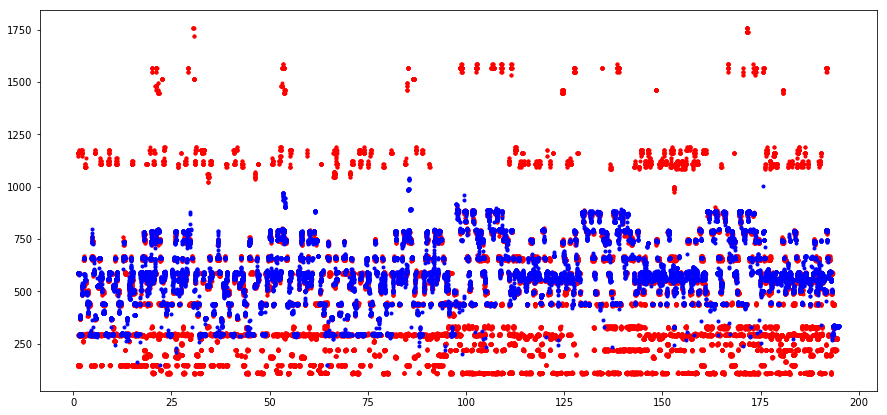

In [18]:
est_t, est_f = get_tf(est_times, est_freqs)
ref_t, ref_f = get_tf(ref_times, ref_freqs)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 7))
plt.plot(est_t, est_f, '.r')
plt.plot(ref_t, ref_f, '.b')
plt.show()